In [3]:
from tools import load_conf, save_conf
from ipyleaflet import Map, basemaps, basemap_to_tiles
from ipywidgets import Layout
from ipyleaflet import Marker, Popup
from ipywidgets import HTML
from store_parser import get_city_stat
from ipywidgets import IntProgress, Text
from IPython.display import display
import time
from il_supermarket_scarper.scrappers_factory import ScraperFactory


max_count = len(ScraperFactory.all_scrapers())
t = Text(value='Downloading Store Info', disabled=True)
progress_bar = IntProgress(min=0, max=max_count) # instantiate the bar
display(t, progress_bar)

city_stat = get_city_stat(progress_bar)
city_location = load_conf('conf/city_location.json')

#defaultLayout=Layout(width='600px', height='700px')

center_israel = (31.783333, 35.216667)
m = Map(
    center=center_israel,
    zoom=8,
    close_popup_on_click=False,
    #layout=defaultLayout
    )

minimal_store_per_city = 30
city_count_location = {k:city_location[k]+[city_stat[k]] for k in city_stat if city_stat[k]>minimal_store_per_city and k in city_location}

for city_name in  city_count_location:
    message = HTML()
    arr = city_count_location[city_name]
    message.value = f'{city_name},{str(arr[2])} חנויות'
    marker = Marker(location=(arr[0],arr[1]))
    marker.popup = message
    m.add_layer(marker)

m

Text(value='Downloading Store Info', disabled=True)

IntProgress(value=0, max=29)

Map(center=[31.783333, 35.216667], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoo…

Text(value='Downloading Store Info', disabled=True)

IntProgress(value=0, max=29)

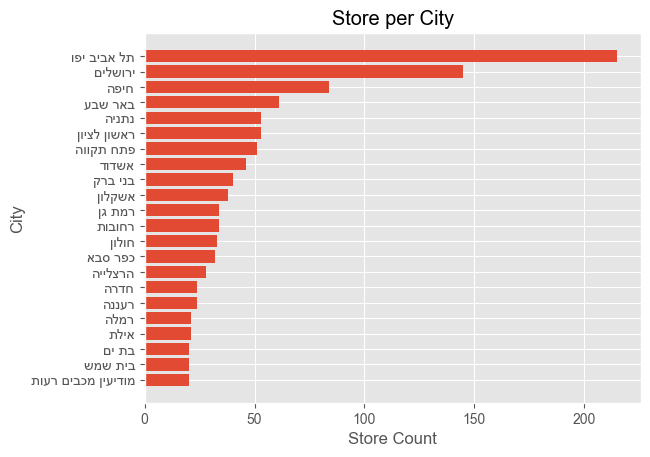

In [2]:
# importing matplotlib module
import matplotlib.pyplot as plt
import matplotlib
from bidi import algorithm as bidialg
from store_parser import get_city_stat
from il_supermarket_scarper.scrappers_factory import ScraperFactory
from ipywidgets import IntProgress, Text

max_count = len(ScraperFactory.all_scrapers())
t = Text(value='Downloading Store Info', disabled=True)
progress_bar = IntProgress(min=0, max=max_count) # instantiate the bar
display(t, progress_bar)

city_stat = get_city_stat(progress_bar)

del city_stat['unknown']
del city_stat['None']
key_to_del = [key for key in city_stat if city_stat[key]<20]
for key in key_to_del:
    del city_stat[key]
city_stat_sorter = sorted(city_stat.items(), key=lambda x:x[1])

matplotlib.rc('font', family='Arial')
plt.style.use('ggplot')
plt.barh([bidialg.get_display(k) for (k,v) in city_stat_sorter], [v for (k,v) in city_stat_sorter])
plt.title('Store per City')
plt.ylabel('City')
plt.xlabel('Store Count')
plt.show()